In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import brewer2mpl
from matplotlib.backends.backend_pdf import PdfPages

root_workdir = 'workdir/hash_profile/'
figures_dir = 'paper-plots/'

In [3]:
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
colors = bmap.mpl_colors

#pp = PdfPages('throughput-exp2.pdf')

params = {
   'axes.labelsize': 9,
   'text.fontsize': 10,
   'legend.fontsize': 9,
   'legend.handlelength': 2,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
   'figure.figsize': [6.0, 2.5]
   }
plt.rcParams.update(params)

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  mplDeprecation)


In [4]:
def plot_hashes_vs_time (hashfile, ax=plt, label=None, c=0):
    with open(hashfile) as f:
        content = f.readlines()
    
    content = [x.strip() for x in content]

    num_hashes = np.array([])
    timed = np.array([])
    for line in content:
        values = line.split(';')
        num_hashes = np.append (num_hashes, int(values[0]))
        timed = np.append (timed, int(values[1]))

    ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
    ax.plot(timed*1e-3, num_hashes, label=label, color=colors[c],
            linewidth=2)
    
    return timed, num_hashes

In [5]:
def parse_hashes_vs_time(hashfile):
    with open(hashfile) as f:
        content = f.readlines()
    
    content = [x.strip() for x in content]

    num_hashes = np.array([])
    timed = np.array([])
    for line in content:
        values = line.split(';')
        num_hashes = np.append (num_hashes, int(values[0]))
        timed = np.append (timed, int(values[1]))
    
    return timed, num_hashes

In [6]:
def compute_m (k, w_av, c):
    price = w_av / (c + 1)
    m  = np.log2(price/k) + 1
    m = np.ceil(m)
    return m

In [7]:
def parse_ab_file(abfile):
    with open(abfile) as f:
        content = f.readlines()
        
    content = [x.strip() for x in content]
    num_requests = np.array([])
    time_per_request = np.array ([])
    for line in content:
        values = line.split(';')
        num_requests = np.append(num_requests, int(values[0]))
        time_per_request = np.append(time_per_request, int(values[1]))
    
    return num_requests, time_per_request

In [11]:
target_time = 400000
k = 2
target_hashes = np.array([])
for hashfile in ['pc46-hps.data', 'cpc96-hps.data', 'pc147-hps.data']:
#for hashfile in ['cpc96-hps.data']:
    timed, num_hashes = parse_hashes_vs_time(root_workdir + hashfile)
    
    target_time_loc = target_time
    indices = np.where ((timed==target_time_loc))
    while (len(indices[0]) == 0):
        target_time_loc += 1
        indices = np.where(timed==target_time_loc)

    index = indices[0][0]
    print "(%d, %d)" % (target_time, num_hashes[index])
    target_hashes = np.append(target_hashes, num_hashes[index])

w_av = np.average(target_hashes)
print "Average number of hashes for %f seconds is %d" % (target_time*1e-6, w_av)
m = compute_m(k=k, w_av=w_av, c=1.1)
print "For k = %d, computed m = %d" %(k,m)

(400000, 118577)
(400000, 170879)
(400000, 132436)
Average number of hashes for 0.400000 seconds is 140630
For k = 2, computed m = 17


# PC's combined

ValueError: invalid literal for int() with base 10: '45.456'

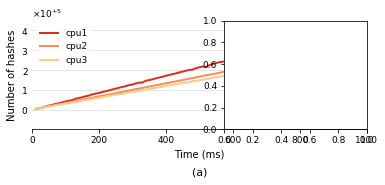

In [20]:
### Parameters
bmap = brewer2mpl.get_map('OrRd', 'Sequential', 4)
colors = bmap.mpl_colors
colors = np.flip(colors,0)

params = {
   'axes.labelsize': 10,
   'text.fontsize': 12,
   'legend.fontsize': 9,
   'legend.handlelength': 2,
   'xtick.labelsize': 9,
   'ytick.labelsize': 9,
   'text.usetex': False,
   'figure.figsize': [6.0, 2.0]
   }
plt.rcParams.update(params)

fig = plt.figure()
fig.subplots_adjust(hspace = 0.5, wspace=0.35)

k = 1
#labels = ['pythagoras', 'pc46', 'cpc96', 'pc147']
#labels = ['pc46', 'cpc', 'pc147']
ax = fig.add_subplot(1,1,1)
c = 0
#labels = ['cpu1', 'cpu2', 'cpu3', 'cpu4']
labels = ['cpu1', 'cpu2', 'cpu3']
for hashfile in ['cpc96-hps.data', 'pc147-hps.data', 'pc46-hps.data' ]:
    #ax = fig.add_subplot(1,1,1)
    plot_hashes_vs_time(root_workdir + hashfile, ax, labels[k-1],c)
    c += 1
    k += 1

    
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Number of hashes')

legend = ax.legend(loc='best')
frame = legend.get_frame()
frame.set_facecolor('1')
frame.set_edgecolor('1')

ax.set_yticks(np.arange(0,500000,100000))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlim(0,1000)
ax.set_axisbelow(True)
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', length=0)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True, useLocale=True)
ax.set_ylim(-1e5,4.5e5)
#size = fig.dpi # get fig size in pixels
#ax.set_title('(a)', y=-size) # increase or decrease y as needed
ax.text(0.5, -0.40, '(a)', fontsize=11,\
      horizontalalignment='center', verticalalignment='center', \
      transform=ax.transAxes)

####################
ax = fig.add_subplot(1,2,2)

abfile = root_workdir + 'results-ab/ab.data'
num_requests, time_per_request = parse_ab_file(abfile)
ax.plot(num_requests, 1000.0/time_per_request,color=colors[0], linewidth=2)

ax.set_xlabel('Number of concurrent requests')
ax.set_ylabel('Service parameter', color=colors[0])

ax.tick_params('y', colors=colors[0])
ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlim(0,1100)
ax.set_axisbelow(True)
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', length=0)
ax.set_ylim(-4,25)

ax2 = ax.twinx()
abfile = root_workdir + 'results-ab/ab-rps.data'
num_requests, rps = parse_ab_file(abfile)
ax2.plot(num_requests, rps, color=colors[1], linewidth=2)

ax2.set_ylim(910,1150)
ax2.set_ylabel('Service rate', color=colors[1])
ax2.tick_params('y', colors=colors[1])
ax2.get_xaxis().tick_bottom()
ax2.set_xlim(0,1100)
ax2.tick_params(axis='y', length=0)
#fig.show()
ax.text(0.5, -0.40, '(b)', fontsize=11,\
      horizontalalignment='center', verticalalignment='center', \
      transform=ax.transAxes)

plt.savefig(figures_dir+'nash.pdf', bbox_inches = 'tight')

# Separate figures

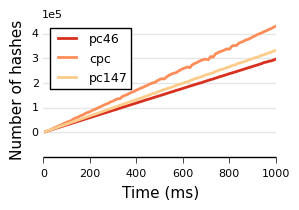

In [402]:
### Parameters
bmap = brewer2mpl.get_map('OrRd', 'Sequential', 4)
colors = bmap.mpl_colors
colors = np.flip(colors,0)

params = {
   'axes.labelsize': 11,
   'text.fontsize': 12,
   'legend.fontsize': 9,
   'legend.handlelength': 2,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
   'figure.figsize': [3.0, 1.75]
   }
plt.rcParams.update(params)

fig = plt.figure()

k = 1
labels = ['pc46', 'cpc', 'pc147']
ax = fig.gca()
c = 0
for hashfile in ['pc46-hps.data', 'cpc96-hps.data', 'pc147-hps.data']:
    #ax = fig.add_subplot(1,1,1)
    plot_hashes_vs_time(hashfile, ax, labels[k-1],c)
    c += 1
    k += 1

    
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Number of hashes')
ax.legend(loc='best')
ax.set_yticks(np.arange(0,500000,100000))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlim(0,1000)
ax.set_axisbelow(True)
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', length=0)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True, useLocale=True)
ax.set_ylim(-1e5,4.5e5)

ax2 = ax.twinx()
ax2.set_yticks([])

plt.savefig(figures_dir+'nash-a.pdf', bbox_inches = 'tight')

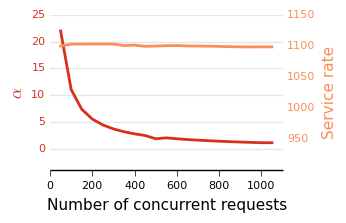

In [403]:
### Parameters
bmap = brewer2mpl.get_map('OrRd', 'Sequential', 4)
colors = bmap.mpl_colors
colors = np.flip(colors, 0)
params = {
   'axes.labelsize': 11,
   'text.fontsize': 12,
   'legend.fontsize': 9,
   'legend.handlelength': 2,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
   'figure.figsize': [3.0, 2.0]
   }
plt.rcParams.update(params)

fig = plt.figure()
#ax = fig.add_subplot(1,1,1)
ax = fig.gca()

abfile = root_workdir + 'results-ab/ab.data'
num_requests, time_per_request = parse_ab_file(abfile)
ax.plot(num_requests, 1000.0/time_per_request,color=colors[0], linewidth=2)

ax.set_ylabel(r'$\alpha$', fontsize=12, color=colors[0])
ax.set_xlabel('Number of concurrent requests')

ax.tick_params('y', colors=colors[0])
ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlim(0,1100)
ax.set_axisbelow(True)
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='y', length=0)
ax.set_ylim(-4,25)

ax2 = ax.twinx()
abfile = root_workdir + 'results-ab/ab-rps.data'
num_requests, rps = parse_ab_file(abfile)
ax2.plot(num_requests, rps, color=colors[1], linewidth=2, linestyle='-')

ax2.set_ylim(901,1150)
ax2.set_ylabel('Service rate', color=colors[1])
ax2.tick_params('y', colors=colors[1])
# ax2.get_xaxis().tick_bottom()
ax2.set_xlim(0,1100)
ax2.tick_params(axis='y', length=0)

plt.savefig(figures_dir+'nash-b.pdf', bbox_inches = 'tight')

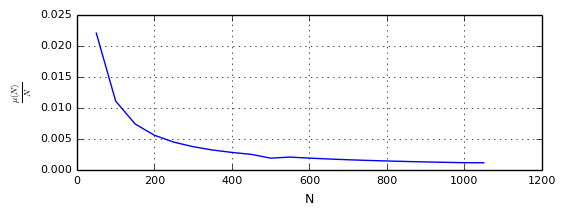

In [170]:
abfile = root_workdir + 'results-ab/ab.data'
num_requests, time_per_request = parse_ab_file(abfile)
fig = plt.figure()
plt.plot(num_requests, 1.0/time_per_request)
plt.ylabel(r'$\frac{\mu(N)}{N}$')
plt.xlabel(r'N')
plt.grid(True)
#plt.ylim(0.5,1.15)
fig.show()

## Pythagoras

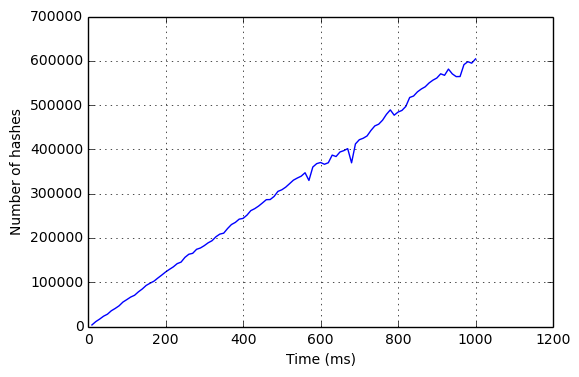

In [18]:
hashfile = 'pythagoras-hps.data'
num_hashes = plot_hashes_vs_time(hashfile)

## PC 46

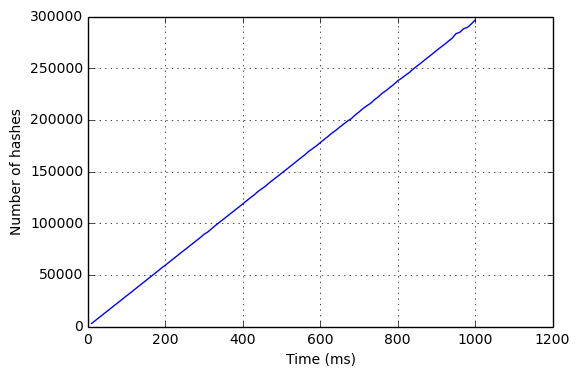

In [19]:
hashfile = 'pc46-hps.data'
num_hashes = plot_hashes_vs_time(hashfile)

## CPC96

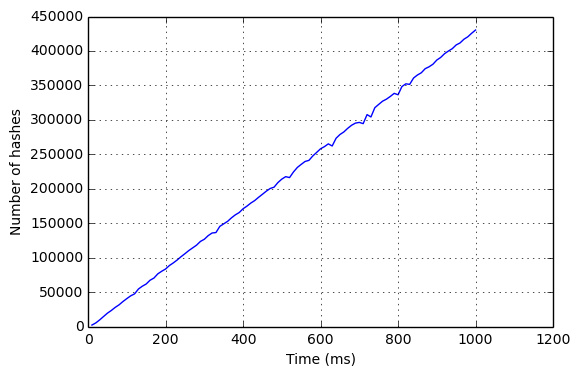

In [20]:
hashfile = 'cpc96-hps.data'
num_hashes = plot_hashes_vs_time(hashfile)